## Practical Lab 5 - Multivariate Regression, Non-Parametric Models and Cross-Validation

In [77]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.datasets import load_diabetes


diaData = load_diabetes()

X = diaData.data
y = diaData.target


df = pd.DataFrame(data=diaData.data, columns=diaData.feature_names)
df['target'] = diaData.target

### Dataset Statistics, Histograms and Correlation Matrix

Below we display the following statistics for our dataset

* Total Count of values

* Mean average of the values

* Standard Deviation

* 1st, 2nd(Median) and 3rd Quartile( representing 25%, 50% and 75% of the data respectively)

* Minimum and Maximum values in the dataset

Also find below and histogram for all the data features and a correlation matrix plotted with a heatmap


 
 Data Stats: 
                 age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

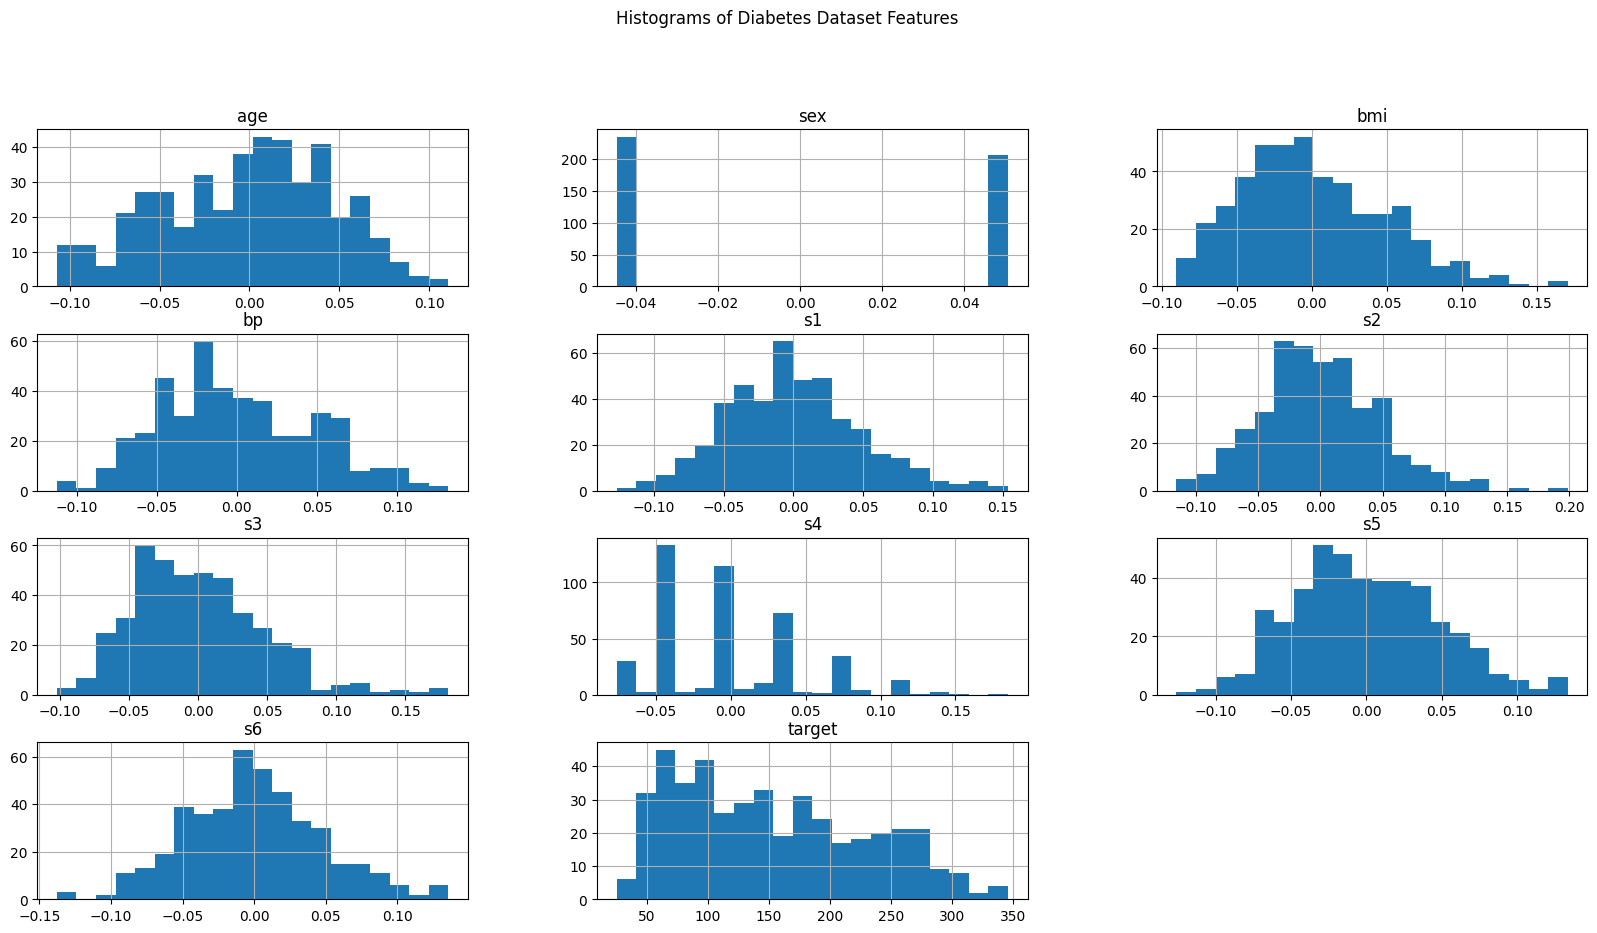

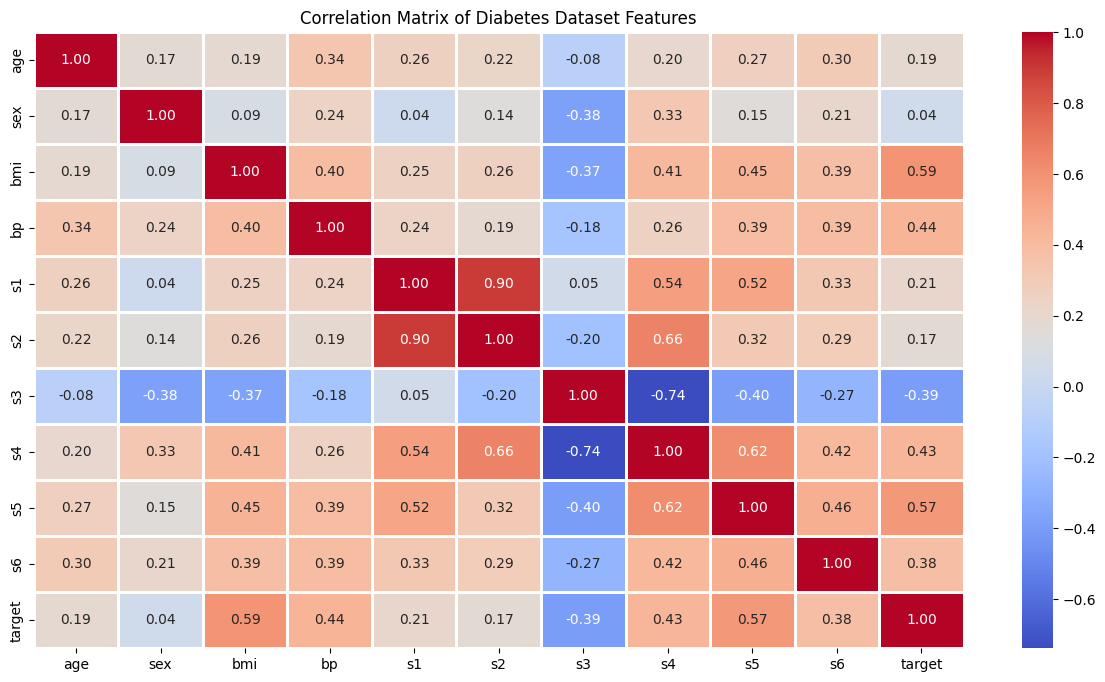

In [78]:
statistics = df.describe()
print(f"\n \n Data Stats: \n {statistics}")

df.hist(bins=20, figsize=(20, 10))
plt.suptitle("Histograms of Diabetes Dataset Features", y=1)
plt.show()


correlation_matrix = df.corr()

plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title("Correlation Matrix of Diabetes Dataset Features")
plt.show()

### Setting aside a test set

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Performing cross-validation, considering cross_validate function

In [80]:
model = RandomForestRegressor()

scoring_metrics = ['neg_mean_squared_error', 'r2']

cv_results = cross_validate(model, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)


### With two polynomial models

In [81]:
degrees = [2, 3] 

scoring_metrics = ['neg_mean_squared_error', 'r2']

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    cv_results = cross_validate(model, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

    print(f"\nResults for Polynomial Degree {degree}:")
    print(f"Negative Mean Squared Error: {np.mean(cv_results['test_neg_mean_squared_error'])}")
    print(f"R-squared (R2): {np.mean(cv_results['test_r2'])}")


Results for Polynomial Degree 2:
Negative Mean Squared Error: -3495.2630742643087
R-squared (R2): 0.39150242015039866

Results for Polynomial Degree 3:
Negative Mean Squared Error: -1028880.5039592178
R-squared (R2): -182.48919443245896


### With two decision trees

In [82]:
max_depth_values = [3, 6]

scoring_metrics = ['neg_mean_squared_error', 'r2']

for max_depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=max_depth)

    cv_results = cross_validate(model, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

    print(f"\nResults for Decision Tree with max_depth={max_depth}:")
    print(f"Negative Mean Squared Error: {np.mean(cv_results['test_neg_mean_squared_error'])}")
    print(f"R-squared (R2): {np.mean(cv_results['test_r2'])}")


Results for Decision Tree with max_depth=3:
Negative Mean Squared Error: -3923.7976156968834
R-squared (R2): 0.31877739572100267

Results for Decision Tree with max_depth=6:
Negative Mean Squared Error: -5070.538543288885
R-squared (R2): 0.12489913346124312


### With two KNNs

In [83]:


k_values = [3, 5]

scoring_metrics = ['neg_mean_squared_error', 'r2']

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)

    cv_results = cross_validate(model, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

    print(f"\nResults for kNN with k={k}:")
    print(f"Negative Mean Squared Error: {np.mean(cv_results['test_neg_mean_squared_error'])}")
    print(f"R-squared (R2): {np.mean(cv_results['test_r2'])}")



Results for kNN with k=3:
Negative Mean Squared Error: -4033.7310691181483
R-squared (R2): 0.3078350404880209

Results for kNN with k=5:
Negative Mean Squared Error: -3620.916153217569
R-squared (R2): 0.37650814581101094



### A table summarizing the cross-validation results including the R-Squared, Mean Absolute Error and MAPE

In [84]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Polynomial Regression (Degree 2)': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Polynomial Regression (Degree 3)': make_pipeline(PolynomialFeatures(3), LinearRegression()),
    'Decision Tree (max_depth=3)': DecisionTreeRegressor(max_depth=3),
    'Decision Tree (max_depth=6)': DecisionTreeRegressor(max_depth=6),
    'kNN (k=3)': KNeighborsRegressor(n_neighbors=3),
    'kNN (k=5)': KNeighborsRegressor(n_neighbors=5)
}

scoring_metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error']

results_list = []

for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, scoring=scoring_metrics, cv=5, return_train_score=False)

    mean_mse = -np.mean(cv_results['test_neg_mean_squared_error'])
    std_mse = np.std(cv_results['test_neg_mean_squared_error'])
    mean_r2 = np.mean(cv_results['test_r2'])
    std_r2 = np.std(cv_results['test_r2'])
    mean_mae = -np.mean(cv_results['test_neg_mean_absolute_error'])
    std_mae = np.std(cv_results['test_neg_mean_absolute_error'])

    predictions = cross_val_predict(model, X, y, cv=5)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    std_mape = np.std(np.abs((y - predictions) / y)) * 100

    results_list.append([
        model_name,
        mean_mse,
        std_mse,
        mean_r2,
        std_r2,
        mean_mae,
        std_mae,
        mape,
        std_mape
    ])

columns = ['Model', 'Mean (MSE)', 'Std (MSE)', 'Mean (R2)', 'Std (R2)', 'Mean (MAE)', 'Std (MAE)', 'Mean (MAPE)', 'Std (MAPE)']
results_df = pd.DataFrame(results_list, columns=columns)

print(results_df)

                              Model    Mean (MSE)     Std (MSE)   Mean (R2)   
0                     Random Forest  3.364408e+03  2.072843e+02    0.418689  \
1  Polynomial Regression (Degree 2)  3.495263e+03  4.571435e+02    0.391502   
2  Polynomial Regression (Degree 3)  1.028881e+06  1.204243e+06 -182.489194   
3       Decision Tree (max_depth=3)  3.923798e+03  1.723398e+02    0.318777   
4       Decision Tree (max_depth=6)  4.764583e+03  5.366977e+02    0.180056   
5                         kNN (k=3)  4.033731e+03  4.467687e+02    0.307835   
6                         kNN (k=5)  3.620916e+03  2.866139e+02    0.376508   

     Std (R2)  Mean (MAE)   Std (MAE)  Mean (MAPE)  Std (MAPE)  
0    0.052491   47.414715    1.621917    41.125275   44.864779  
1    0.120519   46.612882    2.192124    40.274985   45.510789  
2  229.392982  344.401570  140.379665   233.307990  469.308375  
3    0.087342   50.316760    1.331829    43.698611   47.214597  
4    0.075498   54.260509    4.117328    4

### Identifying the best model based on the R-Sqaure value 

In [85]:
best_model_r2 = results_df.loc[results_df['Mean (R2)'].idxmax()]

print("\nBest Model based on Mean (R2):")
print(best_model_r2)


Best Model based on Mean (R2):
Model          Random Forest
Mean (MSE)        3364.40794
Std (MSE)         207.284338
Mean (R2)           0.418689
Std (R2)            0.052491
Mean (MAE)         47.414715
Std (MAE)           1.621917
Mean (MAPE)        41.125275
Std (MAPE)         44.864779
Name: 0, dtype: object


## Using the Rain Forest Model (Best Model based on the RSquared Value)

In [86]:
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

predictions_test = best_model.predict(X_test)

r2_test = r2_score(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mape_test = np.mean(np.abs((y_test - predictions_test) / y_test)) * 100

print("\nResults on the Test Set (Random Forest Model):")
print(f"R-Squared (R2): {r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test}")


Results on the Test Set (Random Forest Model):
R-Squared (R2): 0.41818161764839046
Mean Absolute Error (MAE): 45.52820224719101
Mean Absolute Percentage Error (MAPE): 40.77681582113788


### A graph with the datapoints (train+validation and test), and the fitted model

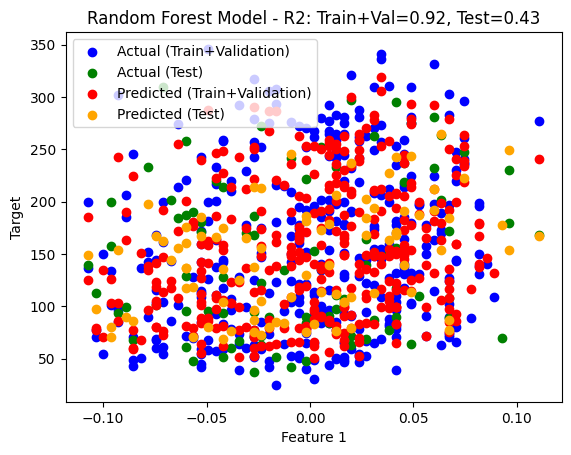

In [87]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_model = RandomForestRegressor()
best_model.fit(X_train_val, y_train_val)

predictions_train_val = best_model.predict(X_train_val)

predictions_test = best_model.predict(X_test)

r2_train_val = r2_score(y_train_val, predictions_train_val)

r2_test = r2_score(y_test, predictions_test)

plt.scatter(X_train_val[:, 0], y_train_val, label='Actual (Train+Validation)', color='blue')
plt.scatter(X_test[:, 0], y_test, label='Actual (Test)', color='green')
plt.scatter(X_train_val[:, 0], predictions_train_val, label='Predicted (Train+Validation)', color='red')
plt.scatter(X_test[:, 0], predictions_test, label='Predicted (Test)', color='orange')

plt.title(f'Random Forest Model - R2: Train+Val={r2_train_val:.2f}, Test={r2_test:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()

### Conclusion